In [1]:
from IPython.display import Image
import numpy as np
import time
import os
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model
import glob
import cv2
import json
from matplotlib import pyplot as plt
import keras

In [2]:
def ver_imgs_gris(noms):
  global imgs
  n=len(noms)
  plt.clf()
  plt.figure(figsize=(6, n*5))
  #plt.figure()#figsize=(20, 4))
  for i in range(n):
      img=imgs[noms[i]]
      print(noms[i],img.shape,'min:',img.min(),'max:',img.max(),'esquina:',img[0,0,0,0])
      #h,w=imgs[i].shape
      ax = plt.subplot(n, 1, i+1)
      plt.imshow(-img[0,:,:,0])
#      plt.imshow(imgs[i].reshape(h, w))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      ax.set_title(noms[i])
  return plt.show()

def reformar_filtros(filtros):
  l=len(filtros)
  m=len(filtros[0])
  n=len(filtros[0][0])
  salida=np.zeros((m,n,1,l))
  print('arreglo',l,n,m,salida.shape)
  for i in range(l):
    for j in range(m):
      for k in range(n):
        #print('ijk',i,j,k,filtros[i][j][k])
        salida[j,k,0,i]=filtros[i][j][k]
  return salida

grises (1, 355, 520, 1) min: 0.0 max: 1.0 esquina: 0.6


<Figure size 640x480 with 0 Axes>

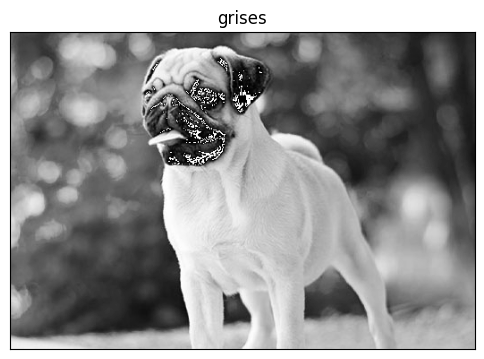

In [3]:
imgs={}
arch='pug1.jpg'
img_tmp=-cv2.imread(arch,0)/255.
imgs['grises']=np.reshape(img_tmp,(1,img_tmp.shape[0],img_tmp.shape[1], 1))
ver_imgs_gris(['grises'])

355 520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
grises (1, 355, 520, 1) min: 0.0 max: 1.0 esquina: 0.6
treshold50 (1, 355, 520, 1) min: 0.0 max: 50.0 esquina: 10.000004


<Figure size 640x480 with 0 Axes>

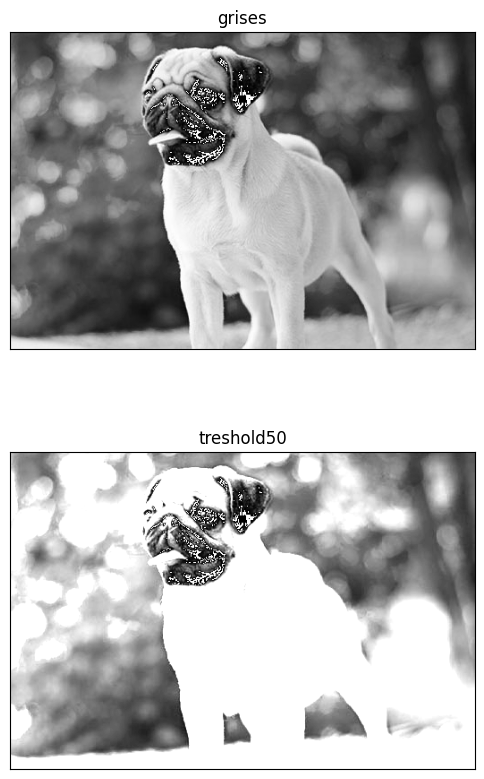

In [4]:
_,h,w,_=imgs['grises'].shape
print(h,w)

input_img = Input(shape=(h,w,1))

x = Conv2D(1, (1, 1), activation='relu', padding='same')(input_img)
modelo1 = Model(input_img, x)

#En vez de entrenar vamos a derle unos valores
modelo1.set_weights([np.array([[[[100.0]]]], dtype=np.float32),np.array([-50.0], dtype=np.float32)])


imgs['treshold50']=modelo1.predict(imgs['grises'])
ver_imgs_gris(['grises','treshold50'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
grises (1, 355, 520, 1) min: 0.0 max: 1.0 esquina: 0.6
treshold50 (1, 355, 520, 1) min: 0.0 max: 50.0 esquina: 10.000004
treshold25 (1, 355, 520, 1) min: 0.0 max: 75.0 esquina: 35.000004


<Figure size 640x480 with 0 Axes>

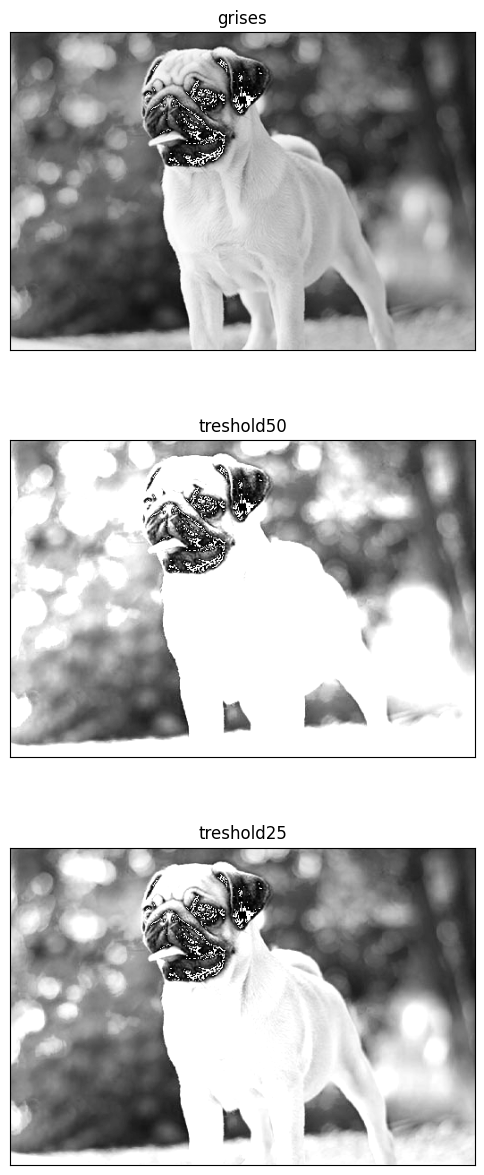

In [5]:
modelo1.set_weights([np.array([[[[100.0]]]], dtype=np.float32),np.array([-25.0], dtype=np.float32)])

imgs['treshold25']=modelo1.predict(imgs['grises'])
ver_imgs_gris(['grises','treshold50','treshold25'])

[array([[[[0.07048774]]]], dtype=float32), array([0.], dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
x.s 1 178 260 1 (1, 355, 520, 1)
sh (1, 178, 260, 1)
treshold50 (1, 355, 520, 1) min: 0.0 max: 50.0 esquina: 10.000004
engrosar_borde (1, 355, 520, 1) min: 0.0 max: 50.0 esquina: 12.745101928710938
engrosar (1, 178, 260, 1) min: 0.0 max: 50.0 esquina: 12.745102


<Figure size 640x480 with 0 Axes>

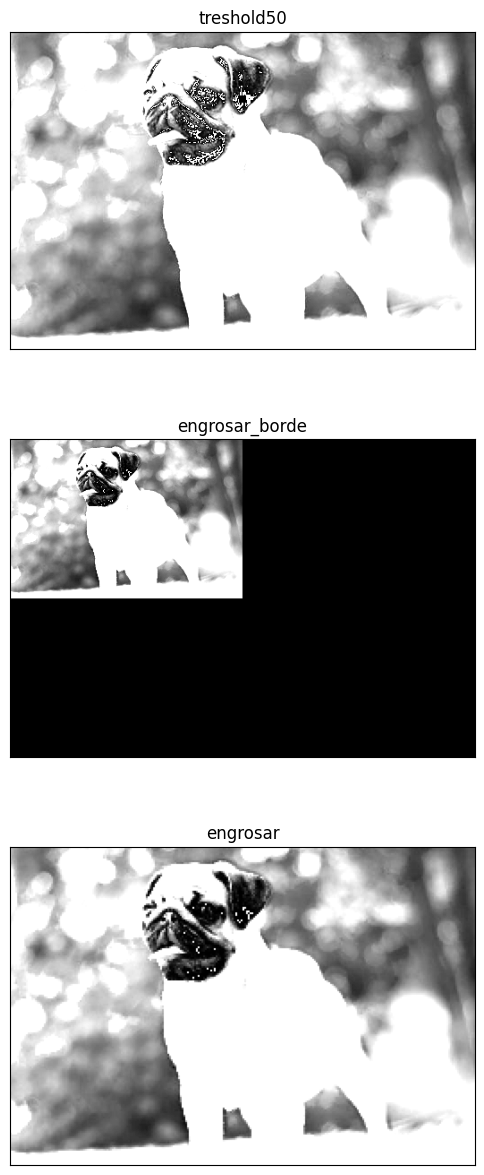

In [6]:
x = Conv2D(1, (1, 1), activation='relu', padding='same')(input_img)
#x = MaxPooling2D((4, 4), strides = (1, 1), padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
modelo2 = Model(input_img, x)
print(modelo2.get_weights())
modelo2.set_weights([np.array([[[[100.0]]]]),np.array([-50.0])])


img_tmp2=np.ones(imgs['grises'].shape)*50

#colocar la imagen centrada
imgs['engrosar']=modelo2.predict(imgs['grises'])
es0,es1,es2,es3=imgs['engrosar'].shape
print('x.s',es0,es1,es2,es3,img_tmp2.shape)
img_tmp2[0,:es1, :es2,0] = imgs['engrosar'][0,:,:,0]
imgs['engrosar_borde']=img_tmp2

sh=imgs['engrosar'].shape
print('sh',sh)
img_tmp2=np.zeros(sh)


ver_imgs_gris(['treshold50','engrosar_borde','engrosar'])

grises (1, 355, 520, 1) min: 0.0 max: 1.0 esquina: 0.6
cuadro (1, 355, 520, 1) min: 0.0 max: 2.0 esquina: 0.0


<Figure size 640x480 with 0 Axes>

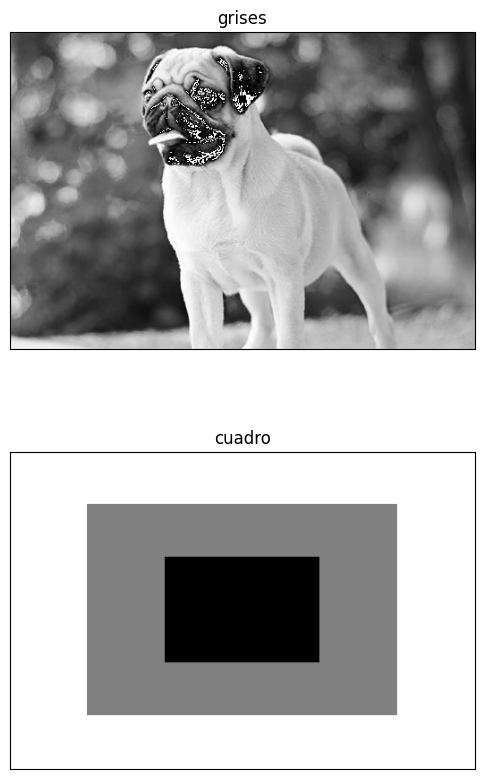

In [7]:
_,gr_alto,gr_ancho,_=imgs['grises'].shape
imgs['cuadro']=np.zeros((1,gr_alto,gr_ancho,1))
imgs['cuadro'][0,int(gr_alto/6):int(gr_alto*5/6), int(gr_ancho/6):int(gr_ancho*5/6),0] = 1
imgs['cuadro'][0,int(gr_alto/3):int(gr_alto*2/3), int(gr_ancho/3):int(gr_ancho*2/3),0] = 2
ver_imgs_gris(['grises','cuadro'])

arreglo 2 2 2 (2, 2, 1, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
conv1a (1, 355, 520, 1) min: -2.0 max: 2.0 esquina: 0.0
conv2a (1, 355, 520, 1) min: -2.0 max: 2.0 esquina: 0.0


<Figure size 640x480 with 0 Axes>

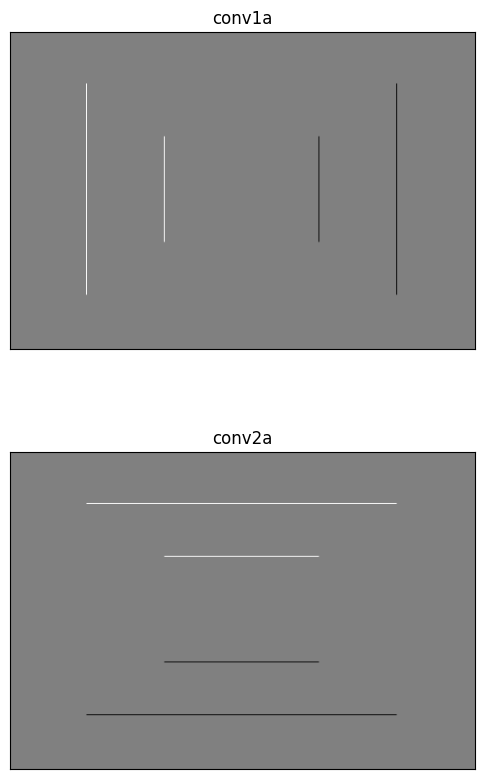

In [8]:
x = Conv2D(2, (2, 2), activation='linear', padding='same')(input_img)
modelo3 = Model(input_img, x)

#En vez de entrenar vamos a derle unos valores
filtro1=[
    [ 1,-1],
    [ 1,-1]]
filtro2=[
    [ 1, 1],
    [-1,-1]]

filtros=reformar_filtros([filtro1,filtro2])

modelo3.set_weights([filtros,np.array([0,0], dtype=np.float32)])

img_tmp4=modelo3.predict(imgs['cuadro'])
#img_tmp4=modelo3.predict(imgs['grises'])

output_height, output_width = img_tmp4.shape[1], img_tmp4.shape[2]

# Redimensionar usando las dimensiones reales
imgs['conv1a'] = np.reshape(img_tmp4[0, :, :, 0], (1, output_height, output_width, 1))
imgs['conv2a'] = np.reshape(img_tmp4[0, :, :, 1], (1, output_height, output_width, 1))

ver_imgs_gris(['conv1a','conv2a'])

arreglo 3 3 3 (3, 3, 1, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
conv0 (1, 355, 520, 1) min: -3.0 max: 3.0 esquina: 0.0
conv1 (1, 355, 520, 1) min: -3.0 max: 3.0 esquina: 0.0
conv2 (1, 355, 520, 1) min: -7.0 max: 4.0 esquina: 0.0


<Figure size 640x480 with 0 Axes>

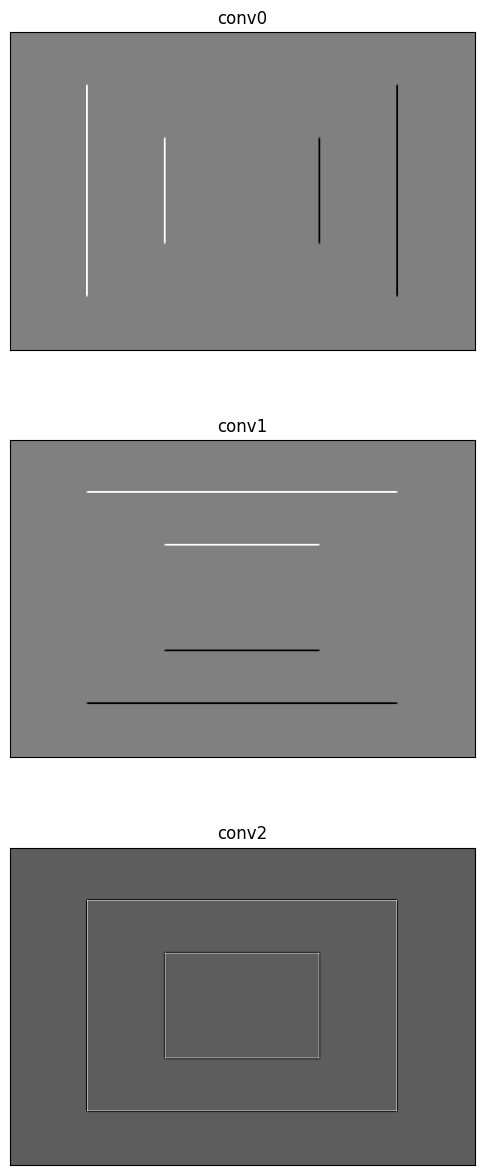

In [9]:
x = Conv2D(3, (3, 3), activation='linear', padding='same')(input_img)
modelo3 = Model(input_img, x)

#En vez de entrenar vamos a derle unos valores
filtro1=[
    [ 1, 0,-1],
    [ 1, 0,-1],
    [ 1, 0,-1]]
filtro2=[
    [ 1, 1, 1],
    [ 0, 0, 0],
    [-1,-1,-1]]
filtro3=[
    [  1,  2,  1],
    [  2,-12,  2],
    [  1,  2,  1]]

filtros=reformar_filtros([filtro1,filtro2,filtro3])

modelo3.set_weights([filtros,np.array([0,0,0], dtype=np.float32)])

img_tmp4=modelo3.predict(imgs['cuadro'])
#img_tmp4=modelo3.predict(imgs['grises'])

output_height, output_width = img_tmp4.shape[1], img_tmp4.shape[2]

imgs['conv0']=np.reshape(img_tmp4[0,:,:,0],(1, output_height, output_width, 1))
imgs['conv1']=np.reshape(img_tmp4[0,:,:,1],(1, output_height, output_width, 1))
imgs['conv2']=np.reshape(img_tmp4[0,:,:,2],(1, output_height, output_width, 1))

ver_imgs_gris(['conv0','conv1','conv2'])